Exploratory Data Analysis
=============

### 01 - Introduction

In this notebook we will make a Exploratory Data Analysis with the following goals in mind:

* Analyze the features of our clean data in order to understand the relationship between them.
* Answer the following questions:
    1. Es mejor
    2. Es peor
    3. Es igual
* Process the variables for feeding machine learning model/s.

__Importing Libraries__

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
# figure size
rcParams['figure.figsize'] = 11,6

### 02 - Knowing our data

A quick look at our data:

In [19]:
loans = pd.read_csv("../data/clean/loans.csv", sep = "^")

In [20]:
loans.head(10)

,funded_amnt_inv,term,issue_d,installment,int_rate,grade,emp_title,emp_length,annual_inc,title,dti,home_ownership,zip_code,addr_state,last_pymnt_amnt,total_pymnt_inv,total_rec_late_fee,application_type,total_acc,loan_status
0,10000.0,60 months,Mar-2016,262.34,19.53%,D,lpn/charge nurse,4 years,52000.0,Other,15.00,OWN,317xx,GA,9575.49,11127.83,0.0,Individual,12.0,Fully Paid
1,35000.0,60 months,Mar-2016,941.96,20.75%,E,Coiler,3 years,85000.0,Debt consolidation,24.98,MORTGAGE,144xx,NY,509.10,37226.47,0.0,Individual,19.0,Fully Paid
2,20000.0,60 months,Mar-2016,416.73,9.16%,B,Reliability Engineer,1 year,77000.0,Home improvement,13.75,MORTGAGE,606xx,IL,416.73,9147.70,0.0,Individual,19.0,Current
3,17475.0,60 months,Mar-2016,384.06,11.47%,B,NaN,NaN,41682.0,Debt consolidation,30.06,MORTGAGE,796xx,TX,384.06,8432.61,0.0,Individual,18.0,Current
4,8000.0,36 months,Mar-2016,255.00,9.16%,B,Technician,10+ years,72000.0,Debt consolidation,22.63,RENT,217xx,MD,255.00,5601.86,0.0,Individual,12.0,Current
5,14400.0,36 months,Mar-2016,469.74,10.75%,B,Coder,10+ years,85000.0,Business,28.11,MORTGAGE,037xx,NH,10992.93,15673.13,0.0,Individual,33.0,Fully Paid
6,18000.0,60 months,Mar-2016,400.31,11.99%,C,Registered Nurse,6 years,100000.0,Debt consolidation,20.41,MORTGAGE,986xx,WA,14885.49,20465.85,0.0,Individual,40.0,Fully Paid
7,5800.0,36 months,Mar-2016,191.18,11.47%,B,shipping,2 years,21000.0,NaN,16.91,RENT,799xx,TX,191.18,4198.57,0.0,Individual,10.0,Current
8,12500.0,60 months,Mar-2016,293.85,14.46%,C,Occupational Therapist Assisstant,1 year,91000.0,Debt consolidation,11.83,RENT,270xx,NC,293.85,6444.62,0.0,Individual,15.0,Current
9,3000.0,36 months,Mar-2016,93.17,7.39%,A,account sales manager,10+ years,90000.0,Home improvement,1.23,MORTGAGE,184xx,PA,93.17,2047.58,0.0,Individual,25.0,Current


Shape of the dataframe:

In [21]:
loans.shape

(1765426, 20)

Variable types:

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765426 entries, 0 to 1765425
Data columns (total 20 columns):
funded_amnt_inv       float64
term                  object
issue_d               object
installment           float64
int_rate              object
grade                 object
emp_title             object
emp_length            object
annual_inc            float64
title                 object
dti                   float64
home_ownership        object
zip_code              object
addr_state            object
last_pymnt_amnt       float64
total_pymnt_inv       float64
total_rec_late_fee    float64
application_type      object
total_acc             float64
loan_status           object
dtypes: float64(8), object(12)
memory usage: 269.4+ MB


NA count:

In [23]:
loans.isnull().sum()

funded_amnt_inv            0
term                       0
issue_d                    0
installment                0
int_rate                   0
grade                      0
emp_title             112310
emp_length            104920
annual_inc                 4
title                  23325
dti                      579
home_ownership             0
zip_code                   1
addr_state                 0
last_pymnt_amnt            0
total_pymnt_inv            0
total_rec_late_fee         0
application_type           0
total_acc                 29
loan_status                0
dtype: int64

### 03 - Loan Status Analysis

Since one of our project main goals is to predict whether a debt is going to be paid or not, this part of the analysis will focus on `loan_status` variable, i. e., the current status of the loan.

Loan status __distribution__:

In [24]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

We are going to consider _Does not meet the credit policy. Status:Fully Paid_ as `Fully Paid` and _Does not meet the credit policy. Status:Charged Off_ as `Charged Off` although the do not meet the credit policy.

In [25]:
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Fully Paid", 'loan_status'] = "Fully Paid"
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Charged Off", 'loan_status'] = "Charged Off"

In [26]:
loans['loan_status'].value_counts()

Current               843754
Fully Paid            700678
Charged Off           182960
Late (31-120 days)     21742
In Grace Period        11812
Late (16-30 days)       4423
Default                   57
Name: loan_status, dtype: int64

Let's plot the distribution in a barplot:

Text(0.5,1,'Loan Status Count')

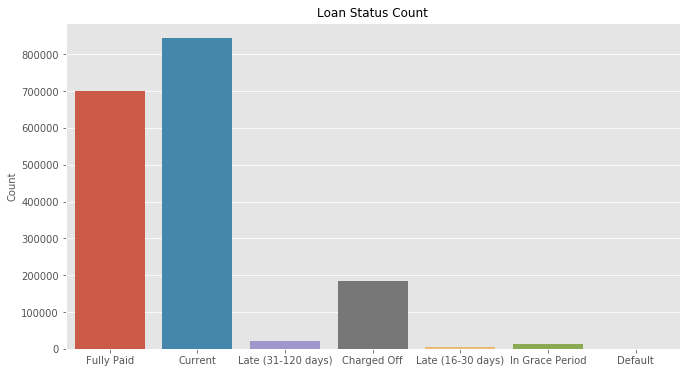

In [27]:
g = sns.countplot(x="loan_status", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Count", fontsize=10)
g.set_title("Loan Status Count", fontsize=12)

About half of the loans have been finished (`Fully Paid` and `Charged Off`) and the other half are on course (`Current` and the other _"late"_ status). For the purpose of this work, __we are going to consider `Charged Off` status as unpaid loan__. Therefore, more than 20% of the finished loans have been unpaid.

Loan status __by funded amount__:

Text(0.5,1,'Loan Amount distribution by Status')

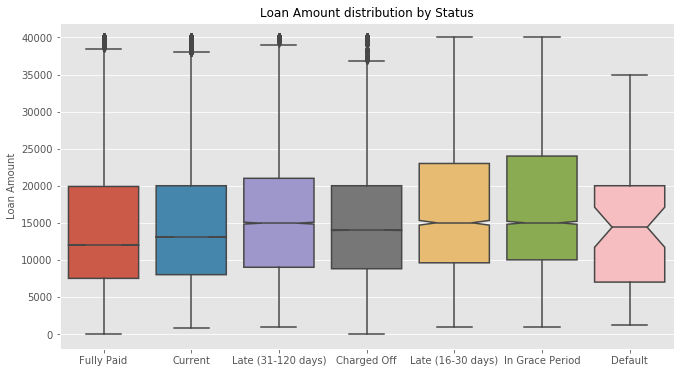

In [56]:
g = sns.boxplot(x="loan_status", y="funded_amnt_inv", 
                data=loans, notch = True) # notch for showing 95% confidence interval (median)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount distribution by Status", fontsize=12)

It seems that there is not evidence that _default_ loan amounts are higher or lower than the _fully paid_. 

Loan status __by year__:

For this analysis we have to preprocess the `issue_d` variable. We are only interested in the year of the loan and we will not consider it as date or numeric variable but categorical:

In [29]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

Text(0.5,1,'Loan Status by Year')

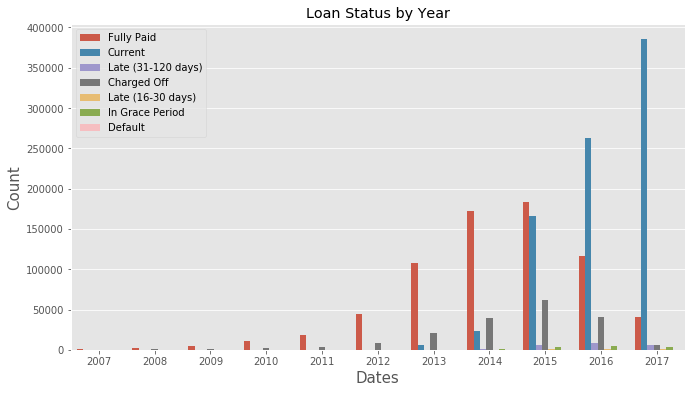

In [30]:
g = sns.countplot(x='issue_d', data=loans,
                  hue='loan_status')

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper left")
g.set_title("Loan Status by Year")

Although the number of issued loans has been increased exponentially since 2007, the ratio between those loans that have been paid and those that have not been paid seems to be unvariable regardless of the year and the amount of issued loans.

__Unpaid loans by year__:

Text(0.5,1,'Defaults by Year')

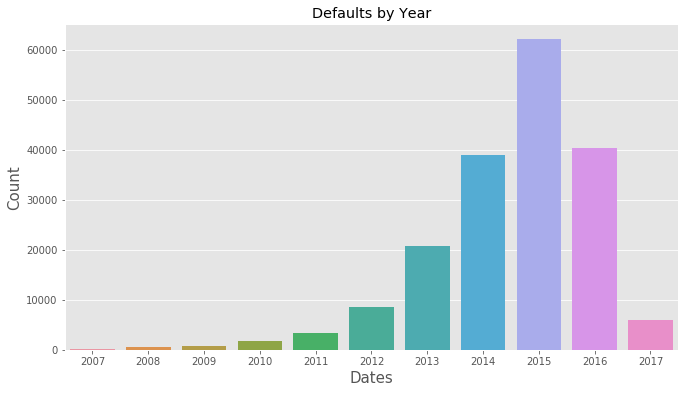

In [31]:
g = sns.countplot(x="issue_d", data=loans[(loans['loan_status']=="Charged Off") | 
                                          (loans['loan_status']=="Default")])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Defaults by Year")

Obviously, the number of unpaid loans have decreased from 2015 due to there are many loans on course (`Current` status). 

The number of unpaid loans have exponentially increased from 2007 as well as the number of issued loans. Detect if a __new lending club user__ is going to pay a loan or not seems to be a very interesting issue to answer in this project.

Loan_status __by Grade__:

Text(0.5,1,'Loan Status by Grade')

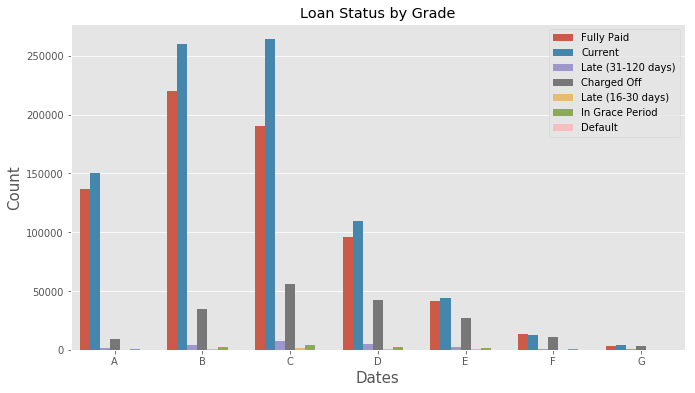

In [37]:
g = sns.countplot(x='grade', data=loans,
                  hue='loan_status', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper right")
g.set_title("Loan Status by Grade")

In [42]:
loans_by_grade = loans[(loans['loan_status'] == "Fully Paid") |
                       (loans['loan_status'] == "Charged Off")]

In [46]:
pd.crosstab(loans_by_grade['grade'], loans_by_grade['loan_status']).apply(lambda x: x/x.sum(), axis=1).\
    style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

loan_status,Charged Off,Fully Paid
grade,,
A,0.0646124,0.935388
B,0.13604,0.86396
C,0.226056,0.773944
D,0.30622,0.69378
E,0.391078,0.608922
F,0.452067,0.547933
G,0.483798,0.516202


RELLLENAR PREGUNTA:

__¿Son los usuarios inicialmente calificados con un riesgo mayor más propensos a incurrir en impago?__

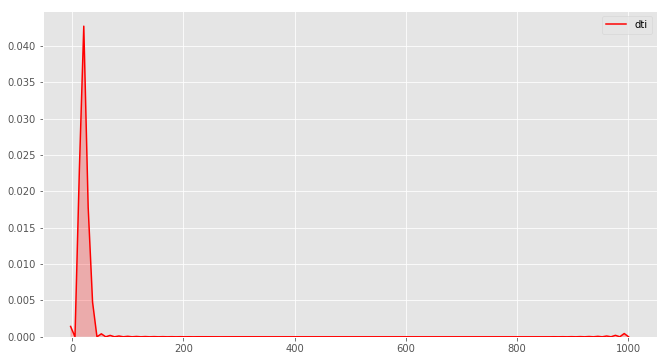

In [73]:
sns.kdeplot(loans["dti"][(loans["loan_status"] == "Fully Paid") & (loans["dti"].notnull())], color="Red",shade = True)

### 04 - Non Loan Status Analysis

__Purpose of the loan__:

RELLLENAR PREGUNTA:

__¿Con qué propósitos piden los usuarios los créditos?__

In [68]:
loans['title'].map(lambda x: str(x).lower()).value_counts()

debt consolidation                         914895
credit card refinancing                    342375
home improvement                           107241
other                                       92777
major purchase                              33513
nan                                         23325
medical expenses                            18874
business                                    16316
car financing                               15573
vacation                                    11130
moving and relocation                       10693
consolidation                                7746
home buying                                  7302
debt consolidation loan                      4683
credit card consolidation                    3510
personal loan                                3314
consolidation loan                           2597
credit card payoff                           2530
credit card refinance                        2438
consolidate                                  2100


Type of users: __Job and Incomes__:

RELLLENAR PREGUNTA:

__¿Qué tipos de usuarios acceden a esta plataforma?__

In [70]:
loans['emp_title'].value_counts()

Teacher                                     30145
Manager                                     26290
Owner                                       16496
Registered Nurse                            12234
RN                                          11756
Supervisor                                  11230
Driver                                      10445
Sales                                       10131
Project Manager                              8656
Office Manager                               7553
General Manager                              7224
Director                                     7132
owner                                        6827
President                                    6155
manager                                      5801
Engineer                                     5779
teacher                                      5522
Vice President                               4818
Operations Manager                           4724
driver                                       4430


__Loan Amount by Application Type__ (individual or joint) and __Grade__:

Text(0.5,1,'Loan Amount by Grade and Application Type')

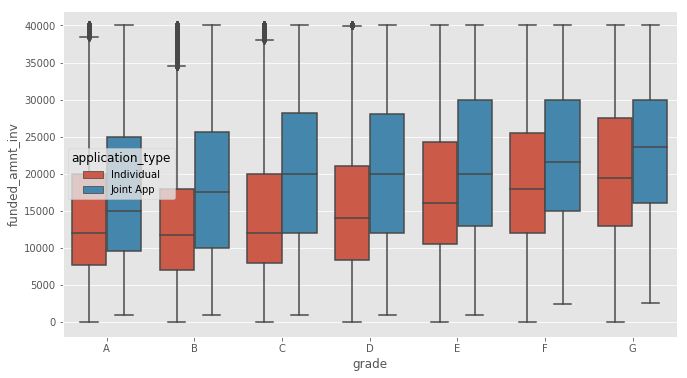

In [50]:
sns.boxplot(x="grade", y="funded_amnt_inv", data=loans, 
            hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount by Grade and Application Type", fontsize=12)

__Interest Rate by Application Type__ (individual or joint) and __Grade__:

Text(0.5,1,'Interest Rate by Grade and Application Type')

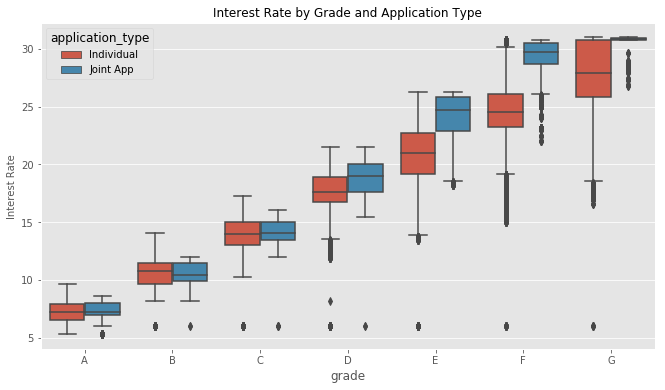

In [49]:
g = sns.boxplot(x="grade", y="int_rate", data=loans, 
            hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_ylabel("Interest Rate", fontsize=10)
g.set_title("Interest Rate by Grade and Application Type", fontsize=12)

__Numeric Variables Correlation__:

In [54]:
numeric_variables = ['funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti', 
                     'last_pymnt_amnt', 'total_pymnt_inv', 'total_rec_late_fee', 'total_acc']

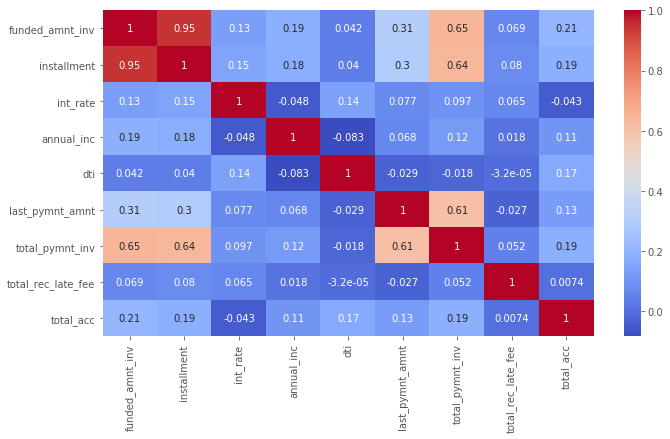

In [55]:
sns.heatmap(loans[numeric_variables].corr(),cmap="coolwarm",annot=True)

__Installment__ distribution:

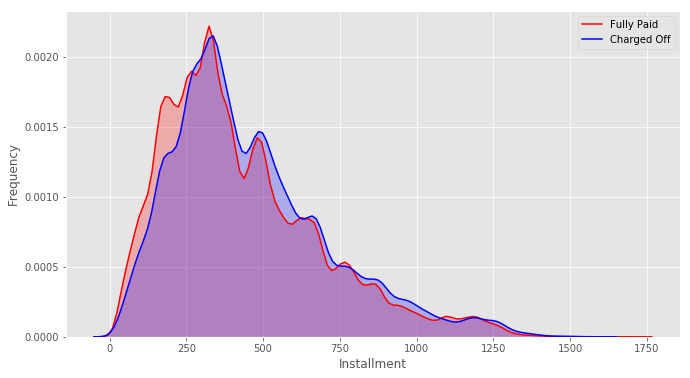

In [75]:
g=sns.kdeplot(loans["installment"][(loans["loan_status"] == "Fully Paid") & (loans["installment"].notnull())], color="Red",shade = True)
g=sns.kdeplot(loans["installment"][(loans["loan_status"] == "Charged Off") & (loans["installment"].notnull())], ax=g, color="Blue",shade = True)
g.set_xlabel("Installment")
g.set_ylabel("Frequency")
g.legend(["Fully Paid","Charged Off"])

### 05 - Conclusions